# Sampling and the Central Limit Theorem

![sample](https://media.giphy.com/media/OsOP6zRwxrnji/giphy.gif)

## Lesson Objectives


By the end of this lesson students will be able to:

1. Differentiate between the following terms: 
    - descriptive/inferential statistics 
    - population/sample
    - paramater/statistic
    - sample distribution/sampling distribution
2. Define and calculate standard error
3. Use Numpy to randomly sample a distribution
4. Describe the central limit theorem and connect it to our knowledge of distributions and sampling.
5. Construct confidence intervals

## Probability vs Statistics
- Probability starts with known probabilities and obtains **how probable any particular observation would be**
- Statistics works the other way around. Start with and observations (data) and **try to determine its probability**

## Descriptive vs Inferential Statistics
- Descriptive Statistics
   > simply describe what is observed. The average height of a high school football team can be directly calculated by measuring all of the current players height.
- Inferential statistics 
    > try to say something general about a larger group of subjects than those we have measured. For example, we would be doing inferential statistics if we wanted to know about the average height of all high school football teams.
    - To put it another way, statistical inference is the process by which we take observations of a subset of a group and generalize to the whole group.

## Population Inference

The mayor's office has hired Flatiron Data Science Immersive students to determine a way to fix traffic congestion. A good starting point is to determine what proportion of the population of DC owns a car.

![traffic](https://media.giphy.com/media/3orieWY8RCodjD4qqs/giphy.gif)

In order for us to make any determinations about a population, we must first get information about it.

Because it's usually completely impractical to get data about *everyone* in a population, we must take a sample.

## Key Terms
 - the entire group is known as the **population**  
 - the subset is a known as the **sample**


![pop](./img/sample_pop.png)

- We would use samples if the population is:
    - Too big to enumerate
    - too difficult/time consuming or expensive to sample in its entirety.

**Random sampling is not easy to do**  
Continuing our DC car example, how would we take a sample? 

Here are two strategies we might employ:

* Stand outside of Flatiron at 12 pm and ask random people until *n* responses


* Go to a randomly assigned street corner and at a random time and ask *n* people if they own a car

Which strikes you as better?

What do we want our sample to look like?

In particular, what relationship do we want between the sample and the population? What steps can we take to improve our odds of success in achieving this?

## Discussion

![talk amongst yourselves](https://media.giphy.com/media/l2SpQRuCQzY1RXHqM/giphy.gif)

The first way of sampling is considered a convenience sample.
You are going about collection in a non-random manner

## Sample Conditions

1. The sampled observations must be independent
    - The sampling method must be random  


2. Sample size distribution:
    - The more skewed the sample the larger samples we need. 
    - n > 30 is considered a large enough sample unless there is extreme skew

## Population v Sample Terminology
Characteristics of populations are called **parameters**

Characteristics of a sample are called **statistics**

A sample statistic is a **point estimate** of the population parameter

![imgsample](./img/sample_stats.png)

## A Simulation to Reinforce Our Definitions

Let's create a population of systolic blood pressure of adult males in DC, assuming a mean of 114 mmHg with a standard deviation of 11 mmHg.  We will also assume the adult male population to be 1.5 million. 

It is impossible to measure the systolic blood pressure of every man in DC, but let's assume multiple investigations have led to the conclusion numbers above. These are therefore estimators of the population parameter.

$\Large\hat\mu = 114$  
$\Large\hat\sigma = 11$



Text(0.5, 0, 'Systolic BP')

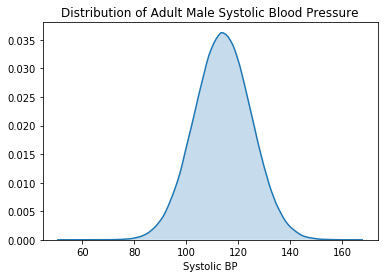

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

pop_size = int(1.5*10**6)
# Use numpy to generate a normal distribution with the paramters above
pop = np.random.normal(loc=114, scale=11, size=pop_size)
fig, ax = plt.subplots()

sns.kdeplot(pop, ax=ax, shade=True)
ax.set_title('Distribution of Adult Male Systolic Blood Pressure')
ax.set_xlabel('Systolic BP')

Let's imagine we want to check whether the above numbers are correct.  We develop an effective manner of random sampling. Our sample size will be 40.

Below, we will simulate with numpy. 


Text(0.5, 1.0, 'Sample Distribution of Systolic BP Measurements')

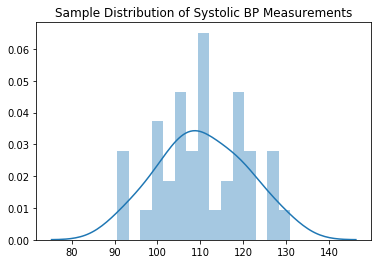

In [2]:
sample_size = 40
sample = np.random.choice(pop, sample_size)

# We can look at the distribution of the values in the sample.

fig, ax = plt.subplots()
sns.distplot(sample, ax=ax, bins=15)
ax.set_title('Sample Distribution of Systolic BP Measurements')

We can then calculate the sample statistics:

In [3]:
print(f'Sample mean: {sample.mean()}')
print(f'Sample standard deviation: {sample.std()}')
print(f'Sample median: {np.median(sample)}')

Sample mean: 110.42506503929481
Sample standard deviation: 9.975173139708026
Sample median: 110.19069297863453


If we repeated this process, taking samples of the population repeatedly, we would get an array of sample statistics.

In [4]:
number_of_samples = 1000
sample_size = 40
sample_stats = []

for _ in range(number_of_samples):
    sample = np.random.choice(pop, sample_size)
    # collect the mean of each of the 1000 samples in sample stats
    sample_stats.append(sample.mean())


The collection of sample stats represents our __sampling distribution__

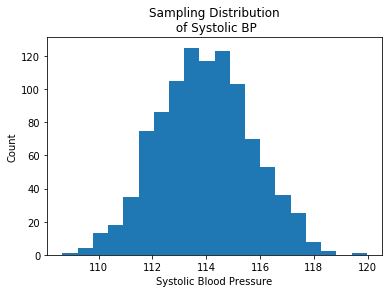

In [5]:
fig, ax = plt.subplots()
ax.hist(sorted(sample_stats), bins=20)
ax.set_title('Sampling Distribution\n of Systolic BP')
ax.set_xlabel("Systolic Blood Pressure")
ax.set_ylabel('Count');

An interesting property of this sampling distribution:
    
 - As we continue to sample, the mean of the sampling distribution gets closer and closer to the population mean.

### Standard Error of the Mean

The standard error of the mean is the standard deviation of the sampling distribution.
The issue is that a sample is not an exact replica of the population. We need to account for that fact in order to make our estimate of the $\mu$ value possible. Let's break it down:

**Population sigma** <br/>

$\large\sigma _{x} = \frac{\sigma }{\sqrt{n}}$

* $ \sigma _{x}$ = standard error of $\bar{x} $
* $ \sigma $ = standard deviation of population

### What is the standard error of the mean for systolic blood pressure example with known mean and standard deviation, assuming a sample size of 40

**What if we do not know the population sigma?**<br>
If we do not know the population standard deviation, we can approximate it by using the sample standard deviation.

$\large\sigma _{x} ≈ \frac{S}{\sqrt{n}}$

* S = sample standard deviation

**Sample size impact on standard error of mean**<br>

How should sample size influence standard error of the mean?

It will get *smaller* as sample size *increases*

![error](./img/diminishing_error.png)  
Important implication: The Standard Error of the mean remains the same as long as the population standard deviation is known and sample size remains the same.


In [6]:
def standard_error(distribution, largest_sample_size, population_std=None):
    
    '''
    Calculate the standard errors for a range of sample sizes
    to demonstrate how standard error decreases when sample 
    size increases.
    '''
 
    std_errors = {}
    
    for sample_size in range(50,largest_sample_size+1):
        sample = np.random.choice(distribution, size=sample_size, replace=True)
        # Standard error with sample distribution standard deviation 
        # in place of population
        if population_std == None:
            std_err = np.std(sample)/np.sqrt(sample_size)
            std_errors[sample_size] = std_err
        
        else:
            std_err = population_std/np.sqrt(sample_size)
            std_errors[sample_size] = std_err
        
    return std_errors
    

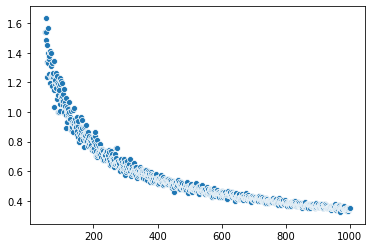

In [7]:
std_errors = standard_error(pop, 1000)

fig, ax = plt.subplots()

sns.scatterplot(list(std_errors.keys()), list(std_errors.values()))

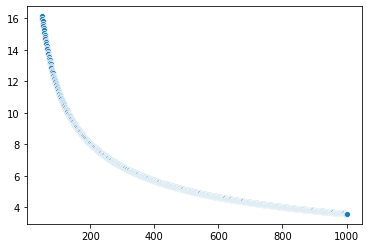

In [8]:
std_errors = standard_error(pop, 1000, population_std=114)

fig, ax = plt.subplots()

sns.scatterplot(list(std_errors.keys()), list(std_errors.values()))

## Your turn!

Word Exercise:

Put the variables in the correct place.


In [9]:

var_1 = 'population'
var_2 = 'sample'
var_3 = 'point estimate'
var_4 = 'statistic'
var_5 = 'parameter'
var_6 = 'sampling'


print(f"""We sampled 40 bee hives and calcuted the mean colony population 
          to be 75,690 bees. 75,690 is a {} of the population paramter\n""")

print(f"""We repeatedly sample 40 people at random from DC and 
        measure their heart rate,then calculate the mean of each sample. 
        We call the plot of this collection of statistics
        the {} distribution.
        """)

print(f"""There are exactly 58 Javan Rhino's left in the wild. 
        Their mean length has been measured accurately at 5 feet.
        This mean length is considered a population {}. 
        """)

print(f"""If we plot a histogram of individual pistil lengths 
      measured on 50 hibiscus flowers, we would be plotting the distribution 
      of an attribute of our {} of hibiscus flowers. 
        """)

print(f"""Since every restaurant in DC is required by law to register
        with the city, we can accurately count the number of active pizza restaurants
         operating right now.  This group represents the {} of actively 
        operating, registered pizza restaurants in DC.
    """)

print(f"""The mean number of hourly hits to Jelle's Marble Racing website 
            randomly sampled across a seven day period represents a sample
            {}.
        """)

SyntaxError: f-string: empty expression not allowed (<ipython-input-9-4dbdf627f950>, line 10)

In [10]:
#SOLUTION


var_1 = 'population'
var_2 = 'sample'
var_3 = 'point estimate'
var_4 = 'statistic'
var_5 = 'parameter'
var_6 = 'sampling'


print(f"""We sampled 40 bee hives and calcuted the mean colony population 
          to be 75,690 bees. 75,690 is a {var_1} of the population paramter\n""")

print(f"""We repeatedly sample 40 people at random from Seattle and 
        measure their heart rate,then calculate the mean of each sample. 
        We call the plot of this collection of statistics
        the {var_2} distribution.
        """)

print(f"""There are exactly 58 Javan Rhino's left in the wild. 
        Their mean length has been measured accurately at 5 feet.
        This mean length is considered a population {var_3}. 
        """)

print(f"""If we plot a histogram of individual pistil lengths 
      measured on 50 hibiscus flowers, we would be plotting the distribution 
      of an attribute of our {var_4} of hibiscus flowers. 
        """)

print(f"""Since every restaurant in Chicago is required by law to register
        with the city, we can accurately count the number of active pizza restaurants
         operating right now.  This group represents the {var_5} of actively 
        operating, registered pizza restaurants in Chicago.
    """)

print(f"""The mean number of hourly hits to Jelle's Marble Racing website 
            randomly sampled across a seven day period represents a sample
            {var_6}.
        """)

We sampled 40 bee hives and calcuted the mean colony population 
          to be 75,690 bees. 75,690 is a population of the population paramter

We repeatedly sample 40 people at random from Seattle and 
        measure their heart rate,then calculate the mean of each sample. 
        We call the plot of this collection of statistics
        the sample distribution.
        
There are exactly 58 Javan Rhino's left in the wild. 
        Their mean length has been measured accurately at 5 feet.
        This mean length is considered a population point estimate. 
        
If we plot a histogram of individual pistil lengths 
      measured on 50 hibiscus flowers, we would be plotting the distribution 
      of an attribute of our statistic of hibiscus flowers. 
        
Since every restaurant in Chicago is required by law to register
        with the city, we can accurately count the number of active pizza restaurants
         operating right now.  This group represents the parameter of ac

## Use numpy to randomly sample a distribution


### Group Exercise

Below, we have different sample scenarios.  Each group will code out the following: 

You are given a "population" to sample from based on the type of distribution.

1. Take a random sample of size n, where n > 30, from the population and calculate the mean of that population.

2. Repeat the sample n numbers of times (n = 1000). 

3. Plot the sampling distribution

4.  Discuss with your group how the sampling distribution differs from the population distribution.

## Group 1:

A bowler on the PBA rolls a strike 60% of the time. The population strikes of all games ever bowled is stored in in the population variable below.


Text(0.5, 1.0, 'Strikes Per Game')

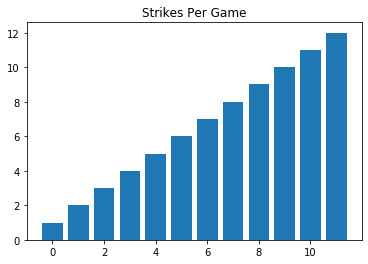

In [11]:
population = np.random.binomial(12, .6, 10000)
fig, ax = plt.subplots()
ax.bar(range(0,12), np.unique(population, return_counts=True)[0])
ax.set_title('Strikes Per Game')

In [12]:
# your code here

(array([  3.,   5.,   9.,  17.,  33.,  43.,  68., 106., 138., 109., 124.,
        101.,  91.,  87.,  31.,  22.,   7.,   4.,   1.,   1.]),
 array([6.4 , 6.48, 6.56, 6.64, 6.72, 6.8 , 6.88, 6.96, 7.04, 7.12, 7.2 ,
        7.28, 7.36, 7.44, 7.52, 7.6 , 7.68, 7.76, 7.84, 7.92, 8.  ]),
 <a list of 20 Patch objects>)

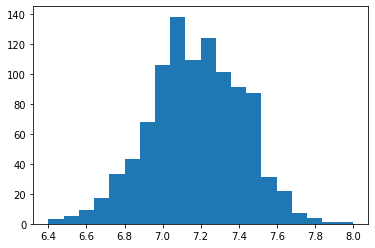

In [13]:
#SOLUTION

sample_means = []
for n in range(1000):
    sample = np.random.choice(population, 50)
    sample_means.append(sample.mean())
    
fig, ax = plt.subplots()
ax.hist(sample_means, bins = 20)

## Group 2:

Stored in the variable below is the number of pieces of mail that arrive per week at your door for each of the 4500 weeks in your life.  

Text(0.5, 0, 'Pieces of Mail')

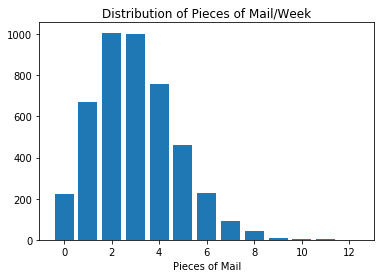

In [14]:
mail_population = np.random.poisson(3, 4500)
counts = np.unique(mail_population, return_counts=True)

fig, ax = plt.subplots()
ax.bar(np.unique(counts[0]), counts[1])
ax.set_title('Distribution of Pieces of Mail/Week')
ax.set_xlabel("Pieces of Mail")

In [15]:
#your code here

Text(0.5, 0, 'Number of pieces of mail')

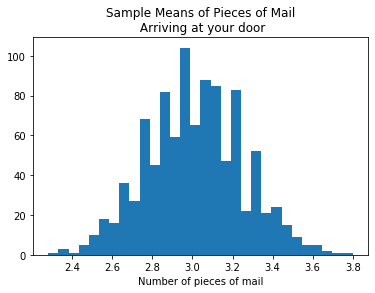

In [16]:
# SOLUTION

sample_means = []
for n in range(1000):
    sample = np.random.choice(mail_population, 50)
    sample_means.append(sample.mean())
    
fig, ax = plt.subplots()
ax.hist(sample_means, bins = 30)
ax.set_title('Sample Means of Pieces of Mail\n Arriving at your door')
ax.set_xlabel('Number of pieces of mail')

## Central Limit Theorem

What we just illustrated above is that if we take repeated samples of a population, **the sampling distribution of sample means will approximate to a normal distribution**, no matter the underlying distribution!  This is called **The Central Limit Theorem**


## $E(\bar{x_{n}}) = \mu$

as n --> "large"

[Seeing Theory](https://seeing-theory.brown.edu/probability-distributions/index.html)

[good video demonstration](https://www.youtube.com/watch?v=jvoxEYmQHNM)


Let's look at an example taken from the ubiquitous Iris dataset. This histogram represents the distributions of sepal length:


![probgif](./img/probability-basics.gif)

https://www.kaggle.com/tentotheminus9/central-limit-theorem-animation

As we will see in hypothesis testing, pairing this theorem with the Empirical rule will be very powerful.

![empirical](img/empirical_rule.png)



Knowing that any sampling distribtion, no matter the underlying population distribution, will approach normality, we will be able to judge, given the empirical rule, how rare a given sample statistic is.  

## Confidence Intervals


A point estimate `x_bar`, of the mean, provides a single plausible value for a parameter. However, as we have seen, a point estimate is rarely perfect; usually there is some error in the estimate. That is why we have suggested using the standard error as a measure of its variability.

Instead of that, a next logical step would be to provide a __plausible range of values__ for the parameter. A plausible range of values for the sample parameter is called a __confidence interval.__

<img src = "./img/margin_of_error.png" width = 450 />

Point estimate +/- margin of error

- We will deal mostly with confidence intervals for the statistics `mean`. We can create CI for other statistics too but this will require more advanced tools. 

**KEY POINT** : Our level of confidence that if we obtained a sample of equal size, our sample interval would contain the population mean.

 - This implies that there is an element of chance whether this interval will contain the true mean or not. In fact, when we calculate 95% confidence intervals, we should expect for every 20 samples and 20 confidence intervals created from these samples, one of them might miss the true parameter.

Let's understand this better using a [visual display](https://seeing-theory.brown.edu/frequentist-inference/index.html#section2).

### Basic Principles in the Construction of Confidence Intervals

 - Our point estimate is the most plausible value of the parameter, so it makes sense to build the confidence interval around the point estimate.

 - The plausability of a range of values can be defined from the sampling distribution of the estimate.

### Central Limit Theorem Recap:


Given a population with a mean $\mu$ and a variance $\sigma^{2}$, the sampling distribution of the mean approaches a normal distribution with a mean of $\mu$ and standard deviation of $\sqrt{\frac{\sigma^{2}}{n}}$ as n, the sample size, increases.


__Note__

SE  = $\sqrt{\frac{\sigma^{2}}{n}}$ will be called the standard error of the mean. We usually denote it with `SE`. Note that standard error of the mean is actually standard deviation of the sampling distribution of the mean.

#### Central Limit Theorem with Respect to Different Population Distributions

In [17]:
from scipy.stats import uniform

In [18]:
from scipy.stats import expon

In [19]:
from scipy.stats import poisson

In [20]:
import math

In [21]:
def central_limit_plot(dist_name, population_size, sample_size, num_samples):
    """
    This function plots the original population distribution and
    the sampling distribution of the mean derived from this population
    """
    if dist_name == "uniform":
        distribution =uniform.rvs(size = population_size)
        mu, sigma = uniform.stats(moments = 'mv')
        sampling_mean_distribution = []
        for i in range(num_samples):
            sample = uniform.rvs(size = sample_size)
            sampling_mean_distribution.append(sample.mean())
    if dist_name == "exponential":
        distribution =expon.rvs(size = population_size)
        mu, sigma = expon.stats(moments = 'mv')
        sampling_mean_distribution = []
        for i in range(num_samples):
            sample = expon.rvs(size = sample_size)
            sampling_mean_distribution.append(sample.mean())
    if dist_name == "poisson":
        distribution =poisson.rvs(mu =math.e, size = population_size)
        mu, sigma = poisson.stats(mu = math.e, moments = 'mv')
        sampling_mean_distribution = []
        for i in range(num_samples):
            sample = poisson.rvs(mu = math.e, size = sample_size)
            sampling_mean_distribution.append(sample.mean())
    sampling_mu = np.mean(sampling_mean_distribution)
    empirical_standard_error = np.std(sampling_mean_distribution)
    se = np.sqrt(sigma/sample_size)
    
    plt.figure(figsize = (10, 8))
    plt.subplot(1,2,1).hist(distribution)
    plt.title("%s Distribution: $\mu$ =%.2f std: %.2f"%(dist_name,mu,sigma))
    plt.subplot(1,2,2).hist(sampling_mean_distribution)
    plt.axvline(x = np.mean(sampling_mean_distribution), 
                color = 'yellow',
                label=  "$\mu$= %.2f"%sampling_mu)
    plt.axvline(x = mu - empirical_standard_error, color = 'red', linestyle = "--", label = "Emprical SE: %.2f"%empirical_standard_error)
    plt.axvline(x = mu + empirical_standard_error, color = 'red', linestyle = "--", label = "SE: %.2f"%se)
    plt.title("Sampling distribution of the mean")
    plt.legend()
    plt.show()

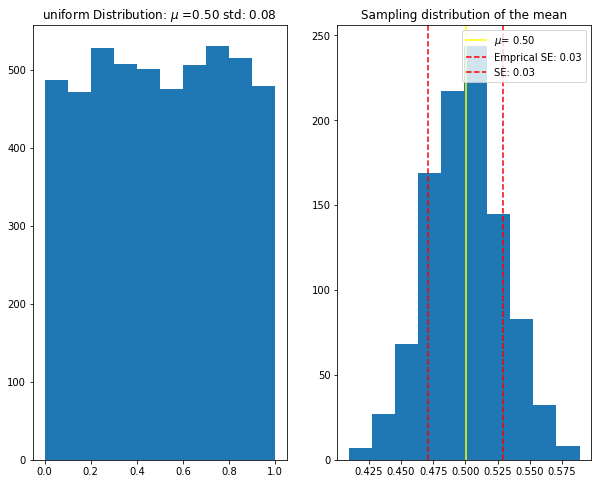

In [22]:
central_limit_plot(dist_name = "uniform", population_size= 5000, sample_size = 100, num_samples= 1000)

## Calculating Confidence Intervals with Heart data

First let's read in our heart data!

In [23]:
import pandas as pd

heart = pd.read_csv('./data/heart.csv')
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


Now let's compute the 95% confidence interval around the mean of cholesterol.  Remember the formula for confidence intervals is 

![](https://lh3.googleusercontent.com/proxy/VIqT8n9eMSulOI5VSGQzoj6o06bgjj1fc2NzA9kVCkvP0fS9wk8k4wGsvYwEmPrn_jKMTUKW2qY72eaY2hL2tv70tFACrRhzqiqtAV_Z62VrBfnnNLTSEOlh06j29J9N1JPe5zUQ5vE0w50ksIRNFjyPf_I70NCeFl9p3wQ)

And here is a quick table of confidence factors for each type of CI.

![](./img/Confidence_factors.png)

In [24]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [25]:
x_bar = heart.chol.mean()

n = len(heart)

sigma = heart.chol.std()

se = np.sqrt(sigma**2/n)

In [26]:
CI = [x_bar - 1.96*se, x_bar + 1.96*se]

In [27]:
CI

[242.8415006095631, 249.1584993904369]

>The confidence interval around the mean of cholesterol indicates that there is a 95% chance that the true mean of cholesterol is between 242 and 249.

### Your Turn!

Calculate the 99% CI around the mean resting blood pressure (`trestbps`).  Interpret the CI

In [28]:
# your code here

In [29]:
#SOLUTION

x_bar = heart.trestbps.mean()

n = len(heart)

sigma = heart.trestbps.std()

se = np.sqrt(sigma**2/n)

CI = [x_bar - 2.576*se, x_bar + 2.576*se]

CI

[130.20229953710043, 133.02111509704594]

#### SOLUTION

There is a 95% chance that the true population mean of resting blood pressure is between 130 and 133.